<a href="https://colab.research.google.com/github/venkataratnamb20/quicksilicon/blob/notebooks/ngspice_sky130_setup_with_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spice Simulation

# Setup

### Install simulator: ngspice

In [1]:
# install ngspice

!ngspice --version || apt-get install ngspice


/bin/bash: line 1: ngspice: command not found
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  ngspice-doc
The following NEW packages will be installed:
  ngspice
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,352 kB of archives.
After this operation, 7,972 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 ngspice amd64 36+ds-1ubuntu0.1 [2,352 kB]
Fetched 2,352 kB in 0s (6,362 kB/s)
Selecting previously unselected package ngspice.
(Reading database ... 123623 files and directories currently installed.)
Preparing to unpack .../ngspice_36+ds-1ubuntu0.1_amd64.deb ...
Unpacking ngspice (36+ds-1ubuntu0.1) ...
Setting up ngspice (36+ds-1ubuntu0.1) ...
Processing triggers for man-db (2.10.2-1) ...


### Download Technology files

Technolog files

- spice models
- standardcell definitions


#### MOSFET Syntax

XMN0 <Drain> <Gate> <Source> <Body> l=0.15 w=2 nf=1 mult=1 m=1

In [2]:
# get sky130

import os
if not os.path.exists('skywater-pdk-libs-sky130_fd_pr'):
    # spice models
    !git clone https://github.com/google/skywater-pdk-libs-sky130_fd_pr.git

if not os.path.exists('skywater-pdk-libs-sky130_fd_sc_hd'):
    # standardcell definitions
    !git clone https://github.com/google/skywater-pdk-libs-sky130_fd_sc_hd.git

Cloning into 'skywater-pdk-libs-sky130_fd_pr'...
remote: Enumerating objects: 5594, done.
remote: Counting objects: 100% (1704/1704), done.
remote: Compressing objects: 100% (188/188), done.
remote: Total 5594 (delta 1558), reused 1516 (delta 1516), pack-reused 3890 (from 1)
Receiving objects: 100% (5594/5594), 111.43 MiB | 22.49 MiB/s, done.
Resolving deltas: 100% (4833/4833), done.
Updating files: 100% (3820/3820), done.
Cloning into 'skywater-pdk-libs-sky130_fd_sc_hd'...
remote: Enumerating objects: 41249, done.
remote: Total 41249 (delta 0), reused 0 (delta 0), pack-reused 41249 (from 1)
Receiving objects: 100% (41249/41249), 211.86 MiB | 18.46 MiB/s, done.
Resolving deltas: 100% (38730/38730), done.
Updating files: 100% (13114/13114), done.


In [3]:
%%writefile .spiceinit


set ngbehavior=hsa
set ng_nomodcheck


Writing .spiceinit


## Example 1: RC Circuit

### Netlist

Important parts

- schematic
- control statements (follow this structure and play with different options)

result
- results are saved in .csv format (rc_tb.csv)


<p align = "center">
    <img src="https://i.sstatic.net/R8uWK.png" width="400px" height="200px" />
</p>

In [5]:
!mkdir -p rcfilter

In [6]:
%%writefile rcfilter/rc_tb.cir

* RC LPF
*** Schemtic
.TITLE RC LPF
R1 vin vout 1M
R2 vout 0 1M
C2 vout 0 1p
* V1 <term1> <term2> DC 0 PULSE (<LOW_VOLTAGE> <HIGH_VOLTAGE> <TD> <TR> <TF> <PW> <PERIOD>)
V1 vin 0 DC 0 PULSE (0V 1.8V 1ns 10ps 10ps 1ns 2ns)

*** Control
.CONTROL
tran 10p 4n
option noinit
set wr_singlescale
set wr_vecnames
save all
save @r1[i] @r2[i]
save @c2[i]
run
wrdata rcfilter/rc_tb.csv V(vin) V(vout) @r1[i] @r2[i] @c2[i]
.ENDC
.END

Writing rcfilter/rc_tb.cir


### Run Simulation

Run Simulation with `ngspice` in batch mode


In [7]:
# run sim

!ngspice -b rcfilter/rc_tb.cir


Compatibility modes selected: hs a


Circuit: RC LPF

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
vin                                          0
vout                                         0
v1#branch                                    0


No. of Data Rows : 441
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Note: No ".plot", ".print", or ".fourier" lines; no simulations run


### Read and plot Result with python

The result (csv) can be opened with excel or any other tools.

Here is the example code to read and plot with python

<ipython-input-8-1b4a0b6badca>:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("rcfilter/rc_tb.csv", delim_whitespace = True, skip_blank_lines=True ).set_index('time')


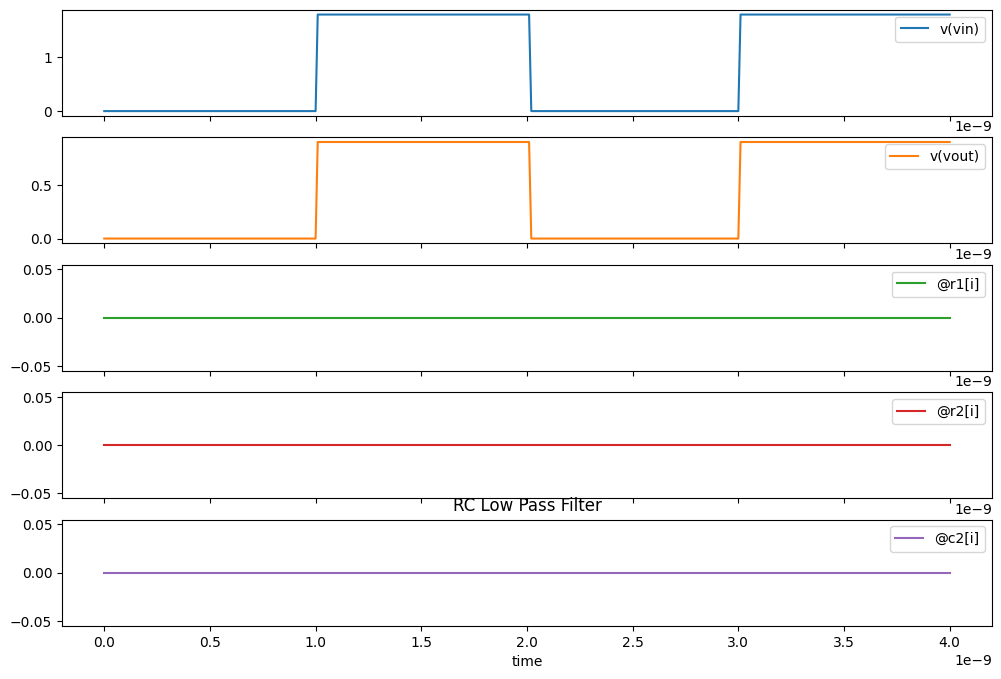

,v(vin),v(vout),@r1[i],@r2[i],@c2[i]
time,,,,,
0.000000e+00,0.0,0.0,0.0,0.0,0.0
1.000000e-13,0.0,0.0,0.0,0.0,0.0
2.000000e-13,0.0,0.0,0.0,0.0,0.0
4.000000e-13,0.0,0.0,0.0,0.0,0.0
8.000000e-13,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
3.964190e-09,1.8,0.9,0.0,0.0,0.0
3.974190e-09,1.8,0.9,0.0,0.0,0.0
3.984190e-09,1.8,0.9,0.0,0.0,0.0


In [8]:
# read data with python
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("rcfilter/rc_tb.csv", delim_whitespace = True, skip_blank_lines=True ).set_index('time')
data.plot(subplots=True, figsize=(12, 8))
plt.title('RC Low Pass Filter')
plt.show()
data


## Example 2: Bipolar Amplifier

### Netlist

Important parts

- schematic
- control statements (follow this structure and play with different options)

result
- results are saved in .csv format (bipamp_tb.csv)

In [9]:
%%writefile bipamp_tb.cir

* bipolar amplifier
* file bipamp.cir
.model BC546B npn ( IS=7.59E-15 VAF=73.4 BF=480 IKF=0.0962 NE=1.2665
+ ISE=3.278E-15 IKR=0.03 ISC=2.00E-13 NC=1.2 NR=1 BR=5 RC=0.25 CJC=6.33E-12
+ FC=0.5 MJC=0.33 VJC=0.65 CJE=1.25E-11 MJE=0.55 VJE=0.65 TF=4.26E-10
+ ITF=0.6 VTF=3 XTF=20 RB=100 IRB=0.0001 RBM=10 RE=0.5 TR=1.50E-07)


R3 vcc intc 10k
R1 vcc intb 68k
R2 intb 0 10k
Cout out intc 10u
Cin intb in 10u
VCC vcc 0 5
Vin in 0 dc 0 ac 1 sin(0 1m 500)
RLoad out 0 100k
Q1 intc intb 0 BC546B
.tran 10u 10m
*.ac dec 10 10 1Meg
.options savecurrents

* Control statements
.CONTROL
    option noinit
    set wr_singlescale
    set wr_vecnames
    save all
    save @r1[i]
    save vcc#branch
    run
    * write data to csv
    wrdata bipamp_tb.csv V(in) V(out) @r1[i]
.ENDC
.end

Writing bipamp_tb.cir


### Run Simulation

Run Simulation with `ngspice` in batch mode


In [10]:
!ngspice -b bipamp_tb.cir


Compatibility modes selected: hs a


Circuit: 

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 1008
Note: No ".plot", ".print", or ".fourier" lines; no simulations run


### Read and plot Result with python

<ipython-input-11-b8e2f7b02e27>:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("bipamp_tb.csv", delim_whitespace = True, skip_blank_lines=True )


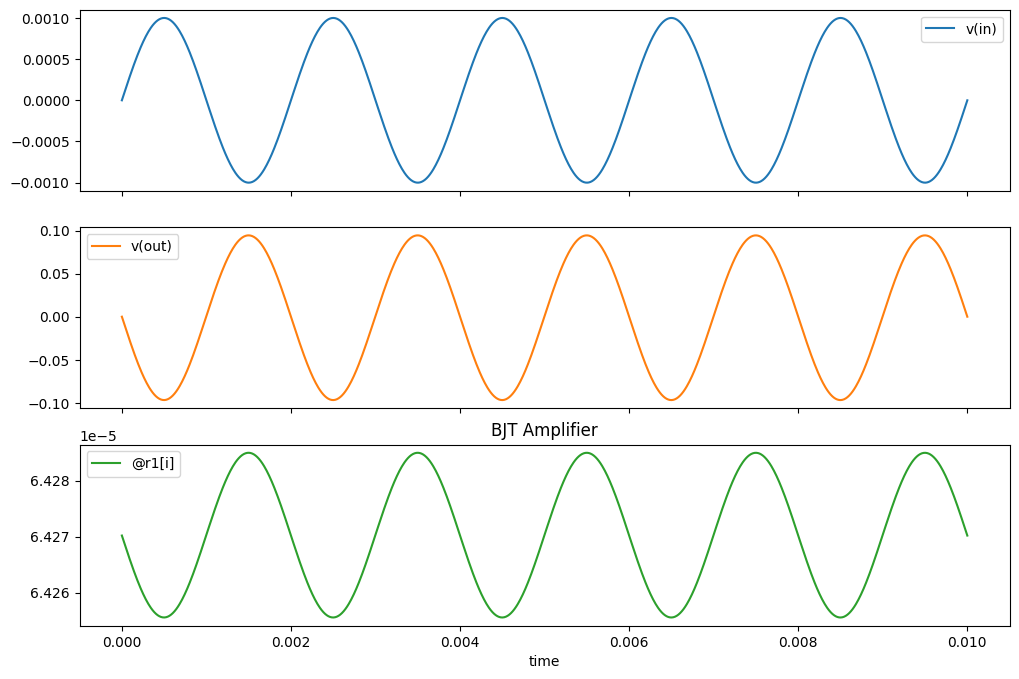

,v(in),v(out),@r1[i]
time,,,
0.000000e+00,0.000000e+00,0.000000,0.000064
1.000000e-07,3.141593e-07,-0.000016,0.000064
2.000000e-07,6.283185e-07,-0.000041,0.000064
4.000000e-07,1.256637e-06,-0.000095,0.000064
8.000000e-07,2.513271e-06,-0.000216,0.000064
...,...,...,...
9.962800e-03,-1.166014e-04,0.011127,0.000064
9.972800e-03,-8.534736e-05,0.008146,0.000064
9.982800e-03,-5.400910e-05,0.005153,0.000064


In [11]:
# read data with python

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("bipamp_tb.csv", delim_whitespace = True, skip_blank_lines=True )
data = data.set_index('time')
data.plot(subplots=True, figsize=(12, 8))
plt.title('BJT Amplifier')
plt.show()

data

## Example 3: Sky130: MOSFET

### Netlist

Important parts

- Add technology library and cell definition if required
- schematic
- control statements (follow this structure and play with different options)

result
- results are saved in .csv format (mosfet_tb.csv)


In [12]:
%%writefile mosfet_tb.cir

* nMOS Testbench
.title common source amplifier with nMOS

* technolyg- spice models
* .lib /usr/local/share/pdk/sky130A/libs.tech/ngspice/sky130.lib.spice tt
.lib /content/skywater-pdk-libs-sky130_fd_pr/models/sky130.lib.spice tt

* /content/skywater-pdk-libs-sky130_fd_pr/models/sky130.lib.spice

* schematic definition
XMN0 DRAIN GATE VGND VGND sky130_fd_pr__nfet_01v8 l=0.5 w=1.5 m=1
Vgnd VGND 0 0
Vdd VPWR VGND 1.8
R VPWR DRAIN 10k
VVin GATE VGND DC 0V PULSE(0V 1.8V 1ns 10ps 10ps 1ns 2ns)

* Control statements
.CONTROL
    tran 10p 4n
    set filetype=ascii
    option noinit
    set wr_singlescale
    set wr_vecnames
    save all
    save allcurrents
    run
    wrdata mosfet_tb.csv V(DRAIN) V(GATE) Vdd#branch
.ENDC
.END


Writing mosfet_tb.cir


### Run Simulation

Run Simulation with `ngspice` in batch mode


In [13]:
# run sim

!ngspice -b mosfet_tb.cir


Compatibility modes selected: hs a



Circuit: common source amplifier with nMOS

option SCALE: Scale is set to 1e-06 for instance and model parameters
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
sky130_fd_pr__esd_nfet_05v0_nvt.pm3               0
                                             0
drain                                      1.8
gate                                         0
vgnd                                         0
vpwr                                       1.8
vvin#branch                                  0
vdd#branch                        -1.94583e-12
vgnd#branch                       -1.05839e-20

 Reference value :  0.00000e+00
No. of Data Rows : 427
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Note: No ".plot", ".print", or ".fourier" lines; no simulations run


### Read and plot Result with python

<ipython-input-14-4618b2260a47>:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("mosfet_tb.csv", delim_whitespace = True, skip_blank_lines=True )


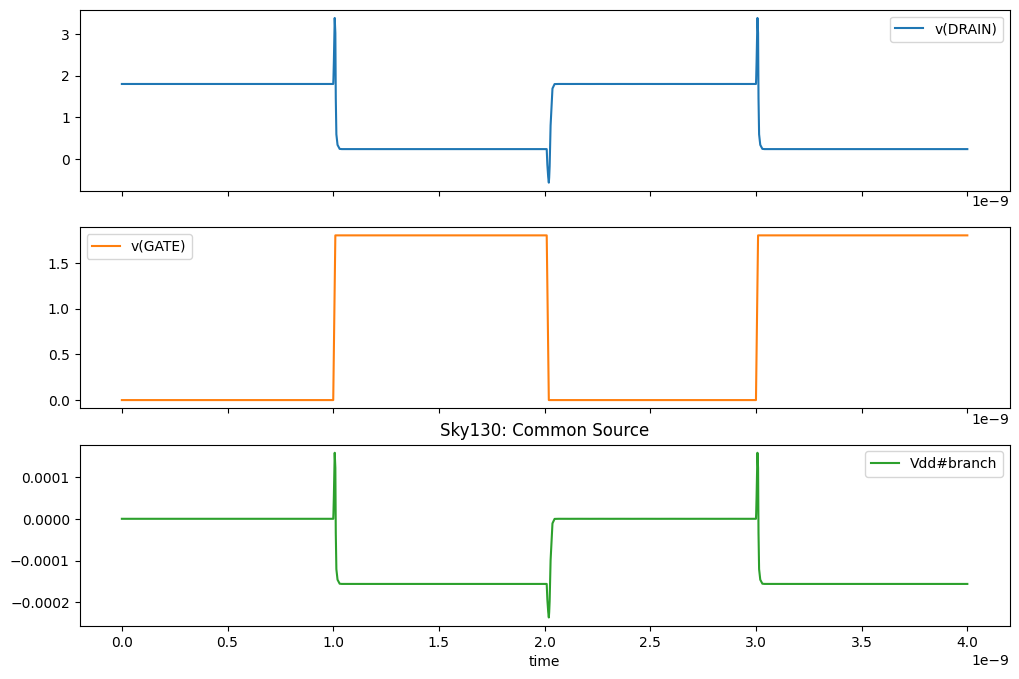

,v(DRAIN),v(GATE),Vdd#branch
time,,,
0.000000e+00,1.800000,0.0,-1.945826e-12
1.000000e-13,1.800000,0.0,-1.945826e-12
2.000000e-13,1.800000,0.0,-1.945826e-12
4.000000e-13,1.800000,0.0,-1.945826e-12
8.000000e-13,1.800000,0.0,-1.945826e-12
...,...,...,...
3.960353e-09,0.243100,1.8,-1.556900e-04
3.970353e-09,0.243124,1.8,-1.556876e-04
3.980353e-09,0.243101,1.8,-1.556899e-04


In [14]:
# read and plot data with python
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("mosfet_tb.csv", delim_whitespace = True, skip_blank_lines=True )
data = data.set_index('time')
data.plot(subplots=True, figsize=(12, 8))
plt.title('Sky130: Common Source')
plt.show()
data

## Example2: NAND Gate

### Netlist

Important parts

- Add technology library and cell definition if required
- schematic
- control statements (follow this structure and play with different options)

result
- results are saved in .csv format (nand_tb.csv)


In [15]:
%%writefile nand_tb.cir

* NAME Testbench

.title sky130_fd_sc_hd__nand2_1

* .include /content/skywater-pdk-libs-sky130_fd_sc_hd/cells/nand2/sky130_fd_sc_hd__nand2_1.spice
* .lib /usr/local/share/pdk/sky130A/libs.tech/ngspice/sky130.lib.spice tt

* technology - standard cellspice definitions
.include /content/skywater-pdk-libs-sky130_fd_sc_hd/cells/nand2/sky130_fd_sc_hd__nand2_1.spice

* technology- spice models
.lib /content/skywater-pdk-libs-sky130_fd_pr/models/sky130.lib.spice tt

* schematic definition
.PARAM vdd = 2.5
Xcell A B VGND VNB VPB VPWR Y sky130_fd_sc_hd__nand2_1
Vgnd VGND 0 0
Vdd VPWR VGND {vdd}
Va A VGND DC 0V PULSE(0V {vdd} 1ns 10ps 10ps 1ns 2ns)
Vb B VGND DC 0V PULSE(0V {vdd} 1.5ns 10ps 10ps 1ns 2ns)

* Control statements
.CONTROL
    tran 10p 4n
    set filetype=ascii
    option noinit
    set wr_singlescale
    set wr_vecnames
    save all
    save allcurrents
    run
    wrdata nand_tb.csv V(A) V(B) V(Y) Vdd#branch
.ENDC
.END

Writing nand_tb.cir


### Run Simulation

Run Simulation with `ngspice` in batch mode


In [16]:
# run sim
!ngspice -b nand_tb.cir


Compatibility modes selected: hs a



Circuit: sky130_fd_sc_hd__nand2_1

option SCALE: Scale is set to 1e-06 for instance and model parameters
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
sky130_fd_pr__esd_nfet_05v0_nvt.pm3               0
                                             0
y                                          2.5
a                                            0
vpwr                                       2.5
vpb                                    2.50001
b                                            0
vgnd                                         0
vnb                                   0.178875
vb#branch                                    0
va#branch                                    0
vdd#branch                        -2.33445e-12
vgnd#branch                        3.47533e-17

 Reference value :  0.00000e+00


### Read and plot Result with Ptython


<ipython-input-17-45621b1c8f3f>:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("nand_tb.csv", delim_whitespace = True, skip_blank_lines=True )


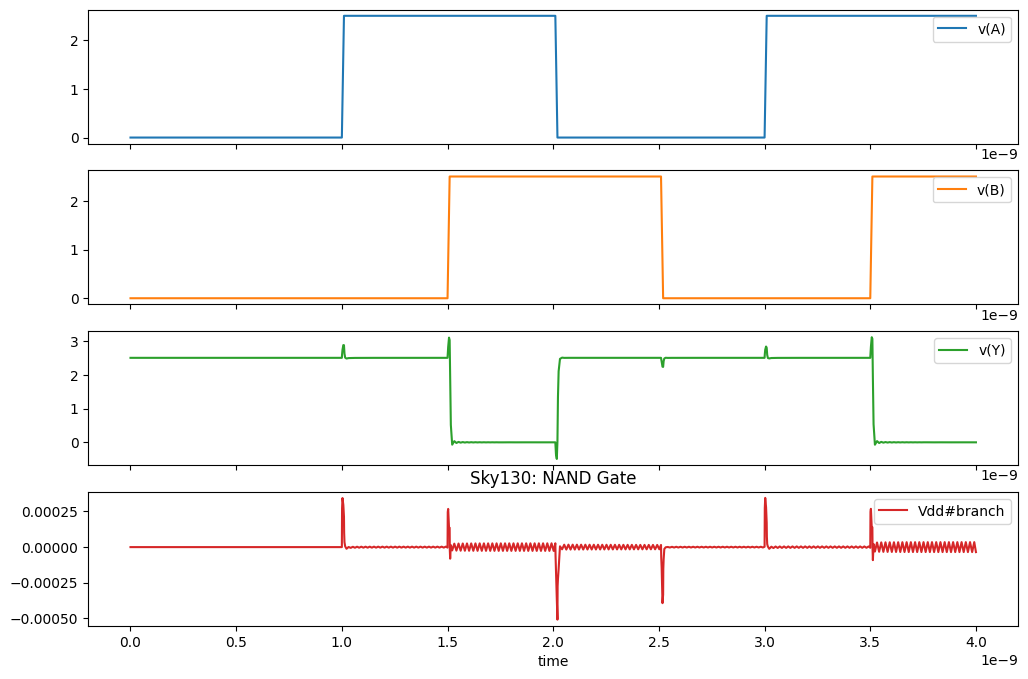

,v(A),v(B),v(Y),Vdd#branch
time,,,,
0.000000e+00,0.0,0.0,2.500000,-2.334452e-12
1.000000e-13,0.0,0.0,2.500000,-2.334476e-12
2.000000e-13,0.0,0.0,2.500000,-2.334483e-12
4.000000e-13,0.0,0.0,2.500000,-2.334508e-12
8.000000e-13,0.0,0.0,2.500000,-2.334464e-12
...,...,...,...,...
3.962000e-09,2.5,2.5,-0.000154,-3.508755e-05
3.972000e-09,2.5,2.5,0.000148,3.509281e-05
3.982000e-09,2.5,2.5,-0.000141,-3.509797e-05


In [17]:
# read and plot data with python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("nand_tb.csv", delim_whitespace = True, skip_blank_lines=True )
data = data.set_index('time')
data.plot(subplots=True, figsize=(12, 8))
plt.title('Sky130: NAND Gate')
plt.show()
data


## Appendix

### ngspice

#### Subckt with Params


Passing parameters to subcircuit

In [18]:
%%writefile rcfilter_with_params.cir

* Param-example .param amplitude= 1V *
.subckt myfilter in out rval=100k cval=100nF
Ra in p1 {2*rval} Rb p1 out {2*rval}
C1 p1 0 {2*cval} Ca in p2 {cval}
Cb p2 out {cval} R1 p2 0 {rval}
.ends myfilter

*
.PARAM vdd = 1.8 amplitude = 1

X1 vin vout myfilter rval=1k cval=1n
* V1 vin 0 AC {amplitude}

Vb vin 0 DC 0V PULSE(0V {vdd} 1.5ns 10ps 10ps 1ns 2ns)

* Control statements
.CONTROL
    * tran 10p 4n
    * ac dec 10 10m 100Meg
    set filetype=ascii
    option noinit
    set wr_singlescale
    set wr_vecnames
    save all
    save allcurrents
    run
    wrdata rcfilter_with_params.csv V(vin) V(vout) Vb#branch
.ENDC

.end


Writing rcfilter_with_params.cir


In [19]:
!ngspice -b rcfilter_with_params.cir


Compatibility modes selected: hs a


Circuit: 

warning, can't find model 'rb' from line
    r.x1.ra vin x1.p1   2.000000000000000e+03     rb p1 out    2.000000000000000e+03   
Error on line 0 :
  r.x1.ra vin x1.p1   2.000000000000000e+03     rb p1 out    2.000000000000000e+03   
  unknown parameter (rb) 
    Simulation interrupted due to error!

Note: No ".plot", ".print", or ".fourier" lines; no simulations run


In [20]:
# zip skywater-pdk-libs-sky130_fd_pr
# !zip -r skywater-pdk-libs-sky130_fd_pr.zip skywater-pdk-libs-sky130_fd_pr


  adding: skywater-pdk-libs-sky130_fd_pr/ (stored 0%)
  adding: skywater-pdk-libs-sky130_fd_pr/cells/ (stored 0%)
  adding: skywater-pdk-libs-sky130_fd_pr/cells/res_xhigh_po/ (stored 0%)
  adding: skywater-pdk-libs-sky130_fd_pr/cells/res_xhigh_po/sky130_fd_pr__res_xhigh_po__base.model.spice (deflated 57%)
  adding: skywater-pdk-libs-sky130_fd_pr/cells/res_xhigh_po/sky130_fd_pr__res_xhigh_po_1p41.model.spice (deflated 47%)
  adding: skywater-pdk-libs-sky130_fd_pr/cells/res_xhigh_po/sky130_fd_pr__res_xhigh_po_0p69.model.spice (deflated 47%)
  adding: skywater-pdk-libs-sky130_fd_pr/cells/res_xhigh_po/sky130_fd_pr__res_xhigh_po.model.spice (deflated 54%)
  adding: skywater-pdk-libs-sky130_fd_pr/cells/res_xhigh_po/sky130_fd_pr__res_xhigh_po_0p35.model.spice (deflated 47%)
  adding: skywater-pdk-libs-sky130_fd_pr/cells/res_xhigh_po/sky130_fd_pr__res_xhigh_po_5p73.model.spice (deflated 47%)
  adding: skywater-pdk-libs-sky130_fd_pr/cells/res_xhigh_po/sky130_fd_pr__res_xhigh_po_2p85.model.spice